In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/agricuture-crops-production-in-india/datafile (2).csv
/kaggle/input/agricuture-crops-production-in-india/datafile.csv
/kaggle/input/agricuture-crops-production-in-india/produce.csv
/kaggle/input/agricuture-crops-production-in-india/datafile (3).csv
/kaggle/input/agricuture-crops-production-in-india/datafile (1).csv


***Importing all the necessary libraries***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [3]:
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"

***Reading the datasets***

In [4]:
data1 = pd.read_csv("../input/agricuture-crops-production-in-india/datafile (1).csv")
data2 = pd.read_csv("../input/agricuture-crops-production-in-india/datafile (2).csv")
data3 = pd.read_csv("../input/agricuture-crops-production-in-india/datafile (3).csv")
data = pd.read_csv("../input/agricuture-crops-production-in-india/datafile.csv")
production = pd.read_csv("../input/agricuture-crops-production-in-india/produce.csv")

In [5]:
df = data.copy()
crops = []
production = []
for i in range(df.shape[0]):
    for _ in range(8):
        crops.append(df['Crop'][i])
    production = production + df.loc[i][1:].tolist()
    
years = df.drop('Crop',axis=1).columns.tolist() * 13

df = pd.DataFrame({'Crop':crops, 'Year': years, 'Production': production})
df = df.dropna().reset_index(drop=True)

fig=px.bar(df,x='Crop', y="Production", animation_frame="Year", 
           animation_group="Crop", color="Crop", hover_name="Crop", range_y=[80,150])
fig.update_layout(title="Production rate of Crops per year")
fig.show()

In [6]:
df = data1[["State","Cost of Cultivation (`/Hectare) A2+FL"]].copy()
df = df.groupby('State')[["Cost of Cultivation (`/Hectare) A2+FL"]].mean().reset_index()
fig = df.plot(kind='bar',x='State',y="Cost of Cultivation (`/Hectare) A2+FL", color="Cost of Cultivation (`/Hectare) A2+FL")
fig.update_layout(title="State-wise Cost of Cultivation (`/Hectare) A2+FL")
fig.show()

*From the above plot we can clearly see that Tamil Nadu has the highest cost of cultivation*

In [7]:
df = data1[["State","Cost of Cultivation (`/Hectare) C2"]].copy()
df = df.groupby('State')[["Cost of Cultivation (`/Hectare) C2"]].mean().reset_index()
fig = df.plot(kind='bar',x='State',y="Cost of Cultivation (`/Hectare) C2", color="Cost of Cultivation (`/Hectare) C2")
fig.update_layout(title="State-wise Cost of Cultivation (`/Hectare) C2")
fig.show()

In [8]:
df = data1[["Crop","Cost of Cultivation (`/Hectare) A2+FL","Cost of Cultivation (`/Hectare) C2"]].copy()
df = df.groupby('Crop')[["Cost of Cultivation (`/Hectare) A2+FL","Cost of Cultivation (`/Hectare) C2"]].mean().reset_index()
fig = df.plot(kind='bar',x='Crop',y=["Cost of Cultivation (`/Hectare) A2+FL","Cost of Cultivation (`/Hectare) C2"],barmode='group')
fig.update_layout(showlegend=False, title='Cost of Cultivation A2+FL vs C2')
fig.show()

In [9]:
df = data1[["State","Cost of Production (`/Quintal) C2"]].copy()
df = df.groupby('State')[["Cost of Production (`/Quintal) C2"]].mean().reset_index()
fig = df.plot(kind='bar',x='State',y="Cost of Production (`/Quintal) C2", color="Cost of Production (`/Quintal) C2")
fig.update_layout(title="State-wise Cost of Production (`/Quintal) C2")
fig.show()

*From the above plot we can see that Karnataka has the highest cost of production*

In [10]:
df = data1[["State","Yield (Quintal/ Hectare) "]].copy()
df = df.groupby('State')[["Yield (Quintal/ Hectare) "]].mean().reset_index()
fig = df.plot(kind='bar',x='State',y="Yield (Quintal/ Hectare) ", color="Yield (Quintal/ Hectare) ")
fig.update_layout(title="State-wise Yield (Quintal/ Hectare)")
fig.show()

*Tamil Nadu shows a phenomenal amout of yield of crops.*

*But one more thing to keep in notice is the yield is decided by Quintal/Hectare.*

*So if the hectare amount is low compared to other states then also the figures will go high but in reality production won't be that high.*

In [11]:
data2 = data2.sort_values('Yield 2010-11', ascending=False).reset_index(drop=True)

In [12]:
df = data2[["Crop             ","Production 2006-07","Production 2007-08","Production 2008-09","Production 2009-10","Production 2010-11"]].copy().head(8)

fig = df.drop(0).plot(kind='bar',x='Crop             ', y=["Production 2006-07","Production 2007-08","Production 2008-09","Production 2009-10","Production 2010-11"])
fig.update_layout(title='Production of Crops from 2006 to 2011')

In [13]:
df = data2[["Crop             ","Area 2006-07","Area 2007-08","Area 2008-09","Area 2009-10","Area 2010-11"]].copy().head(8)

fig = df.drop(0).plot(kind='bar',x='Crop             ', y=["Area 2006-07","Area 2007-08","Area 2008-09","Area 2009-10","Area 2010-11"])
fig.update_layout(title='Area of Crops from 2006 to 2011')

In [14]:
fig = data3.Crop.value_counts().reset_index().head(7).plot(kind='bar', x='index', y='Crop', color='Crop')
fig.update_layout(title='Crops with most varieties')

*Wheat has the most varieties*

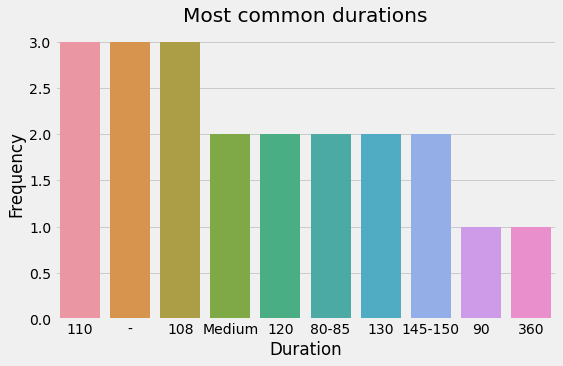

In [15]:
new = data3['Season/ duration in days'].value_counts().reset_index().head(10)
sns.barplot(data=new, x='index', y='Season/ duration in days')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Most common durations')
plt.show()
sns.set_style("white")

In [16]:
fig = data3['Recommended Zone'].str.split(',').str.len().reset_index()['Recommended Zone'].value_counts().reset_index().plot(kind='bar',x='index',y='Recommended Zone')
fig.update_layout(title='Number of States in which most crops are suitable to plant')
fig.show()

In [17]:
print(data1.Crop.value_counts())

ARHAR                   5
COTTON                  5
GRAM                    5
GROUNDNUT               5
MAIZE                   5
MOONG                   5
PADDY                   5
RAPESEED AND MUSTARD    5
SUGARCANE               5
WHEAT                   4
Name: Crop, dtype: int64


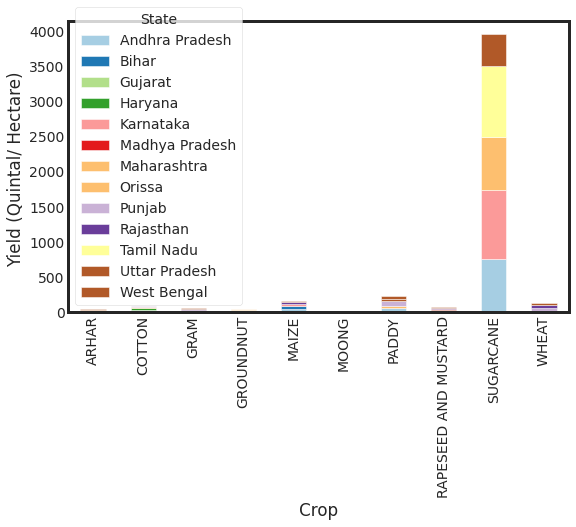

In [18]:
pd.options.plotting.backend = "matplotlib"
columns = ['Crop','State','Yield (Quintal/ Hectare) ']
new_data = data1[columns]
table = new_data.pivot('Crop','State','Yield (Quintal/ Hectare) ')
table = table.fillna(0)
# sns.barplot(data=new_data,colormap='Paired')
table.plot(kind='bar',stacked=True,colormap='Paired')
plt.ylabel('Yield (Quintal/ Hectare) ')
sns.set_style("white")

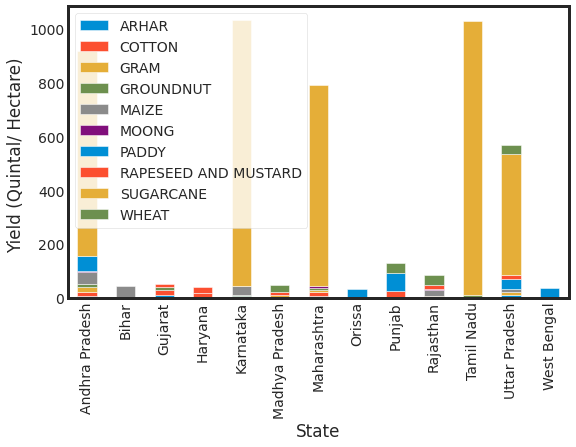

In [19]:
table.T.plot(kind='bar',stacked=True)
plt.ylabel('Yield (Quintal/ Hectare) ')
# setting legend location to best
plt.legend(loc='best')